In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
# Load the JSON file
with open('sentiment_results.json', 'r') as file:
    sentiment_data = json.load(file)

# Confirm the data structure
print(f"Total entries in JSON: {len(sentiment_data)}")

Total entries in JSON: 300


In [4]:
# Check a few entries to find inconsistencies
for entry in sentiment_data[:5]:  # Adjust the slice to inspect more entries
    print(entry)

{'extractive_summary': "Bernie Ecclestone has urged Formula One's teams to start making sacrifices in a bid to save the sport from completely imploding. Ecclestone's words of warning come at the end of a miserable period for F1, notably with Caterham and Marussia entering administration. With costs spiralling out of control, and with the FIA powerless to act, three other cash-strapped teams in Lotus, Force India and Sauber have threatened to boycott the United States Grand Prix as a protest", 'extractive_sentiment': {'label': 'Negative', 'scores': {'Negative': 0.5560591816902161, 'Neutral': 0.4061432182788849, 'Positive': 0.03779762610793114}}}
{'abstractive_summary': "Eccliode has been in the news a lot lately for his comments about the lack in action of F2 teams. He has said that the current situation is 'a bit of an anomaly' and that he has 'no idea how the situation will change'. He also said he would not be 'in the business of making decisions about F3' - a comment which is a bit 

In [5]:
# Flatten and combine rows
rows = []
for i in range(0, len(sentiment_data), 3):  # Process in groups of three
    extractive = sentiment_data[i] if i < len(sentiment_data) else {}
    abstractive = sentiment_data[i + 1] if i + 1 < len(sentiment_data) else {}
    human = sentiment_data[i + 2] if i + 2 < len(sentiment_data) else {}

    row = {
        # Extractive
        'extractive_summary': extractive.get('extractive_summary'),
        'extractive_label': extractive.get('extractive_sentiment', {}).get('label'),
        'extractive_negative': extractive.get('extractive_sentiment', {}).get('scores', {}).get('Negative'),
        'extractive_neutral': extractive.get('extractive_sentiment', {}).get('scores', {}).get('Neutral'),
        'extractive_positive': extractive.get('extractive_sentiment', {}).get('scores', {}).get('Positive'),

        # Abstractive
        'abstractive_summary': abstractive.get('abstractive_summary'),
        'abstractive_label': abstractive.get('abstractive_sentiment', {}).get('label'),
        'abstractive_negative': abstractive.get('abstractive_sentiment', {}).get('scores', {}).get('Negative'),
        'abstractive_neutral': abstractive.get('abstractive_sentiment', {}).get('scores', {}).get('Neutral'),
        'abstractive_positive': abstractive.get('abstractive_sentiment', {}).get('scores', {}).get('Positive'),

        # Human
        'human_label': human.get('human_summary', {}).get('label'),
        'human_negative': human.get('human_summary', {}).get('scores', {}).get('Negative'),
        'human_neutral': human.get('human_summary', {}).get('scores', {}).get('Neutral'),
        'human_positive': human.get('human_summary', {}).get('scores', {}).get('Positive'),
    }
    rows.append(row)

# Create DataFrame
final_df = pd.DataFrame(rows)

# Display the DataFrame
final_df


,extractive_summary,extractive_label,extractive_negative,extractive_neutral,extractive_positive,abstractive_summary,abstractive_label,abstractive_negative,abstractive_neutral,abstractive_positive,human_label,human_negative,human_neutral,human_positive
0,Bernie Ecclestone has urged Formula One's team...,Negative,0.556059,0.406143,0.037798,Eccliode has been in the news a lot lately for...,Negative,0.830958,0.157185,0.011857,Neutral,0.458119,0.494356,0.047525
1,The world's oldest primate - dating back 55 mi...,Positive,0.018226,0.486418,0.495356,The new prune is the oldest living tree in Nor...,Positive,0.003537,0.317980,0.678483,Neutral,0.073779,0.732928,0.193293
2,"By. Daily Mail Reporter. Updated:. 01:46 EST, ...",Negative,0.841865,0.149145,0.008990,"The killer, who is believed to be from the sam...",Negative,0.858300,0.133702,0.007998,Negative,0.815181,0.178062,0.006757
3,By. John Greechan. Amateur champion Bradley Ne...,Positive,0.001188,0.052377,0.946435,The following is a list of the top 10 Open pla...,Neutral,0.048746,0.777486,0.173767,Neutral,0.028466,0.714119,0.257415
4,"By. David Martosko, U.s. Political Editor. PUB...",Neutral,0.229474,0.641056,0.129470,Donald J. Trump has been a major player in the...,Positive,0.016589,0.411372,0.572039,Neutral,0.075489,0.746573,0.177937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Beijing, China (CNN) -- The Chinese public, es...",Negative,0.713196,0.275380,0.011424,Li is charged in connection with the killing o...,Negative,0.635057,0.357834,0.007109,Negative,0.784219,0.204593,0.011188
96,Andre Schurrle impressed on his debut for Wolf...,Positive,0.001892,0.140718,0.857390,Schürrles is a player who has been a key part ...,Positive,0.001373,0.094881,0.903746,Neutral,0.011107,0.748022,0.240870
97,"Philip Levine, a Pulitzer Prize-winning poet w...",Positive,0.017700,0.344331,0.637970,The following is a list of the most important ...,Neutral,0.011685,0.703612,0.284703,Positive,0.027636,0.367603,0.604761
98,(CNN) -- When it comes to deciding where the m...,Neutral,0.197039,0.715619,0.087342,The Lotus F3 team has been in talks with Ferra...,Neutral,0.047805,0.903543,0.048652,Neutral,0.142961,0.732054,0.124985


In [6]:
summary_df = pd.read_csv('./summarization_model_results.csv')
summary_df.head()

,article,human_summary,abstractive_summary,extractive_summary,abstractive_rouge1,abstractive_rouge2,abstractive_rougeL,extractive_rouge1,extractive_rouge2,extractive_rougeL
0,Bernie Ecclestone has urged Formula One's team...,"Ferrari, Red Bull, McLaren and Mercedes receiv...",Eccliode has been in the news a lot lately for...,Bernie Ecclestone has urged Formula One's team...,0.098160,0.000000,0.073620,0.491803,0.366667,0.409836
1,The world's oldest primate - dating back 55 mi...,Archicebus achilles was found near the Yangtze...,The new prune is the oldest living tree in Nor...,The world's oldest primate - dating back 55 mi...,0.157143,0.014493,0.114286,0.342342,0.128440,0.216216
2,By . Daily Mail Reporter . Updated: . 01:46 ES...,Pat Taccetta says ‘justice will be done’ over ...,"The killer, who is believed to be from the sam...","By. Daily Mail Reporter. Updated:. 01:46 EST, ...",0.163934,0.000000,0.087432,0.253521,0.042857,0.084507
3,By . John Greechan . Amateur champion Bradley ...,Bradley Neil achieved one of his Open ambition...,The following is a list of the top 10 Open pla...,By. John Greechan. Amateur champion Bradley Ne...,0.088496,0.000000,0.088496,0.474227,0.273684,0.412371
4,"By . David Martosko, U.s. Political Editor . P...",Trump could face a crowded Republican primary ...,Donald J. Trump has been a major player in the...,"By. David Martosko, U.s. Political Editor. PUB...",0.162437,0.010256,0.131980,0.189781,0.029630,0.116788


In [7]:
merged_df = summary_df.merge(final_df, left_index=True, right_index=True, how='inner')
merged_df.drop(['abstractive_summary_y', 'extractive_summary_y'], axis=1, inplace=True)
merged_df.head()

,article,human_summary,abstractive_summary_x,extractive_summary_x,abstractive_rouge1,abstractive_rouge2,abstractive_rougeL,extractive_rouge1,extractive_rouge2,extractive_rougeL,...,extractive_neutral,extractive_positive,abstractive_label,abstractive_negative,abstractive_neutral,abstractive_positive,human_label,human_negative,human_neutral,human_positive
0,Bernie Ecclestone has urged Formula One's team...,"Ferrari, Red Bull, McLaren and Mercedes receiv...",Eccliode has been in the news a lot lately for...,Bernie Ecclestone has urged Formula One's team...,0.098160,0.000000,0.073620,0.491803,0.366667,0.409836,...,0.406143,0.037798,Negative,0.830958,0.157185,0.011857,Neutral,0.458119,0.494356,0.047525
1,The world's oldest primate - dating back 55 mi...,Archicebus achilles was found near the Yangtze...,The new prune is the oldest living tree in Nor...,The world's oldest primate - dating back 55 mi...,0.157143,0.014493,0.114286,0.342342,0.128440,0.216216,...,0.486418,0.495356,Positive,0.003537,0.317980,0.678483,Neutral,0.073779,0.732928,0.193293
2,By . Daily Mail Reporter . Updated: . 01:46 ES...,Pat Taccetta says ‘justice will be done’ over ...,"The killer, who is believed to be from the sam...","By. Daily Mail Reporter. Updated:. 01:46 EST, ...",0.163934,0.000000,0.087432,0.253521,0.042857,0.084507,...,0.149145,0.008990,Negative,0.858300,0.133702,0.007998,Negative,0.815181,0.178062,0.006757
3,By . John Greechan . Amateur champion Bradley ...,Bradley Neil achieved one of his Open ambition...,The following is a list of the top 10 Open pla...,By. John Greechan. Amateur champion Bradley Ne...,0.088496,0.000000,0.088496,0.474227,0.273684,0.412371,...,0.052377,0.946435,Neutral,0.048746,0.777486,0.173767,Neutral,0.028466,0.714119,0.257415
4,"By . David Martosko, U.s. Political Editor . P...",Trump could face a crowded Republican primary ...,Donald J. Trump has been a major player in the...,"By. David Martosko, U.s. Political Editor. PUB...",0.162437,0.010256,0.131980,0.189781,0.029630,0.116788,...,0.641056,0.129470,Positive,0.016589,0.411372,0.572039,Neutral,0.075489,0.746573,0.177937


### Analyze Summaries

In [8]:
merged_df.describe()

,abstractive_rouge1,abstractive_rouge2,abstractive_rougeL,extractive_rouge1,extractive_rouge2,extractive_rougeL,extractive_negative,extractive_neutral,extractive_positive,abstractive_negative,abstractive_neutral,abstractive_positive,human_negative,human_neutral,human_positive
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.194506,0.019045,0.120795,0.371380,0.167241,0.243782,0.380057,0.431006,0.188937,0.316483,0.421256,0.262261,0.326167,0.506171,0.167662
std,0.075775,0.020271,0.041504,0.126844,0.126967,0.117757,0.294666,0.211625,0.268933,0.307757,0.245579,0.328358,0.289660,0.222868,0.222278
min,0.000000,0.000000,0.000000,0.021978,0.000000,0.021978,0.001188,0.034890,0.003872,0.001142,0.015604,0.002671,0.001786,0.066469,0.005897
25%,0.148260,0.000000,0.094866,0.271241,0.075834,0.155426,0.107147,0.242687,0.018359,0.015451,0.233196,0.022272,0.055588,0.306625,0.020701
50%,0.181818,0.014143,0.117995,0.374295,0.138758,0.222222,0.351740,0.454605,0.047749,0.234602,0.401804,0.073086,0.239096,0.524310,0.066352
75%,0.233333,0.030540,0.143375,0.459026,0.222912,0.302381,0.631202,0.584983,0.232410,0.573423,0.602782,0.464236,0.575683,0.712105,0.207652
max,0.359788,0.091837,0.235294,0.731034,0.699301,0.717241,0.887185,0.869617,0.962816,0.938142,0.903543,0.983021,0.875768,0.923551,0.930780


<Figure size 1200x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

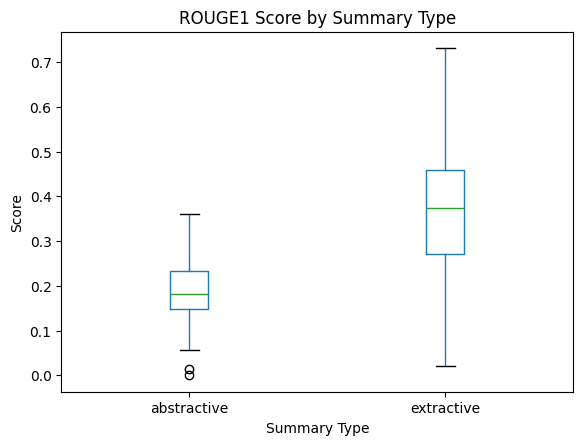

<Figure size 640x480 with 0 Axes>

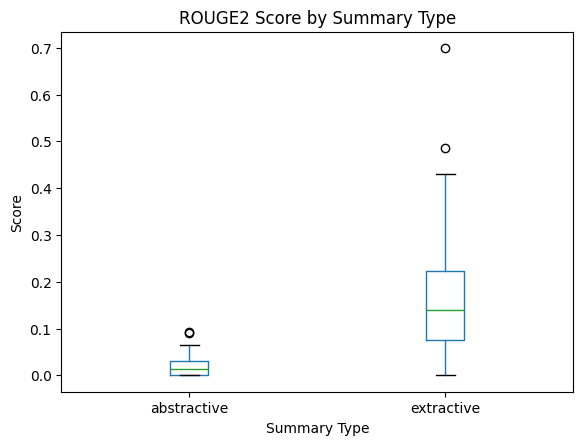

<Figure size 640x480 with 0 Axes>

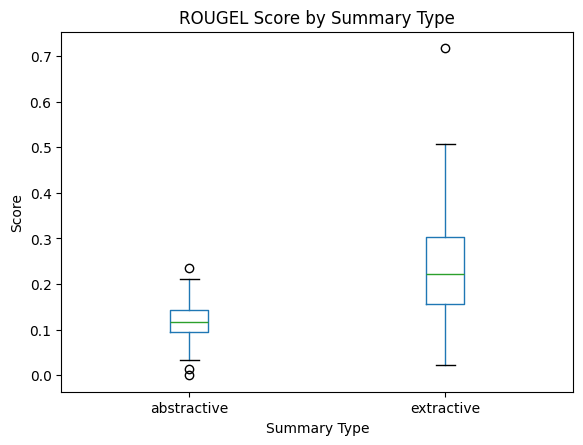

In [15]:
# Melt the DataFrame for easier plotting
rouge_df = merged_df[['abstractive_rouge1', 'abstractive_rouge2', 'abstractive_rougeL', 'extractive_rouge1', 
                      'extractive_rouge2', 'extractive_rougeL']]

# Reshape for plotting
melted_df = rouge_df.melt(
    var_name="metric_type", value_name="score"
)
melted_df['metric'] = melted_df['metric_type'].apply(lambda x: '_'.join(x.split('_')[1:]))
melted_df['summary_type'] = melted_df['metric_type'].apply(lambda x: x.split('_')[0])

# Create boxplots
plt.figure(figsize=(12, 8))
for metric in ['rouge1', 'rouge2', 'rougeL']:
    subset = melted_df[melted_df['metric'] == metric]
    plt.figure()
    subset.boxplot(by='summary_type', column='score', grid=False)
    plt.title(f'{metric.upper()} Score by Summary Type')
    plt.suptitle("")  # Suppress the default suptitle
    plt.ylabel('Score')
    plt.xlabel('Summary Type')
    plt.show()

In [23]:
# Describe distributions of ROUGE scores
print("Abstractive Summary ROUGE Scores:")
print(rouge_df[['abstractive_rouge1', 'abstractive_rouge2', 'abstractive_rougeL']].describe())

print("\nExtractive Summary ROUGE Scores:")
print(rouge_df[['extractive_rouge1', 'extractive_rouge2', 'extractive_rougeL']].describe())

Abstractive Summary ROUGE Scores:
       abstractive_rouge1  abstractive_rouge2  abstractive_rougeL
count          100.000000          100.000000          100.000000
mean             0.194506            0.019045            0.120795
std              0.075775            0.020271            0.041504
min              0.000000            0.000000            0.000000
25%              0.148260            0.000000            0.094866
50%              0.181818            0.014143            0.117995
75%              0.233333            0.030540            0.143375
max              0.359788            0.091837            0.235294

Extractive Summary ROUGE Scores:
       extractive_rouge1  extractive_rouge2  extractive_rougeL
count         100.000000         100.000000         100.000000
mean            0.371380           0.167241           0.243782
std             0.126844           0.126967           0.117757
min             0.021978           0.000000           0.021978
25%             0.27124

In [22]:
from scipy.stats import ttest_rel

# Perform paired t-tests for each metric
for metric in ['rouge1', 'rouge2', 'rougeL']:
    abstractive_scores = rouge_df[f'abstractive_{metric}']
    extractive_scores = rouge_df[f'extractive_{metric}']
    
    t_stat, p_val = ttest_rel(abstractive_scores, extractive_scores)
    print(f"{metric.upper()} - Paired t-test: t-statistic = {t_stat:.2f}, p-value = {p_val}")


ROUGE1 - Paired t-test: t-statistic = -15.47, p-value = 3.539574734068549e-28
ROUGE2 - Paired t-test: t-statistic = -11.72, p-value = 2.0786285225016612e-20
ROUGEL - Paired t-test: t-statistic = -10.86, p-value = 1.4608534906837842e-18


/var/folders/zm/fr635kq51d35fklpj2hv3s240000gn/T/ipykernel_55646/1003998918.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rouge_df[f'abstractive_{metric}'], label='Abstractive', shade=True)
/var/folders/zm/fr635kq51d35fklpj2hv3s240000gn/T/ipykernel_55646/1003998918.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rouge_df[f'extractive_{metric}'], label='Extractive', shade=True)


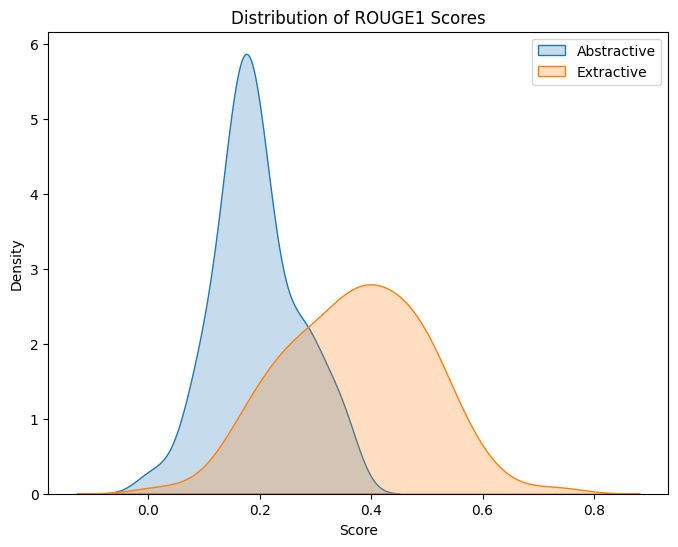

/var/folders/zm/fr635kq51d35fklpj2hv3s240000gn/T/ipykernel_55646/1003998918.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rouge_df[f'abstractive_{metric}'], label='Abstractive', shade=True)
/var/folders/zm/fr635kq51d35fklpj2hv3s240000gn/T/ipykernel_55646/1003998918.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rouge_df[f'extractive_{metric}'], label='Extractive', shade=True)


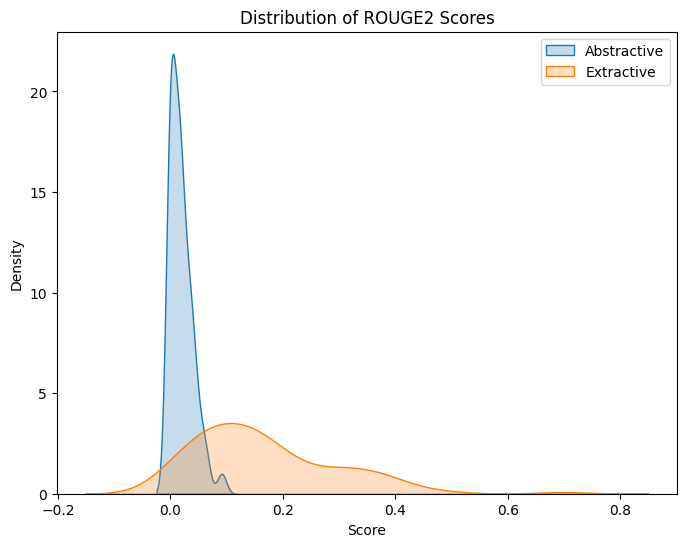

/var/folders/zm/fr635kq51d35fklpj2hv3s240000gn/T/ipykernel_55646/1003998918.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rouge_df[f'abstractive_{metric}'], label='Abstractive', shade=True)
/var/folders/zm/fr635kq51d35fklpj2hv3s240000gn/T/ipykernel_55646/1003998918.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rouge_df[f'extractive_{metric}'], label='Extractive', shade=True)


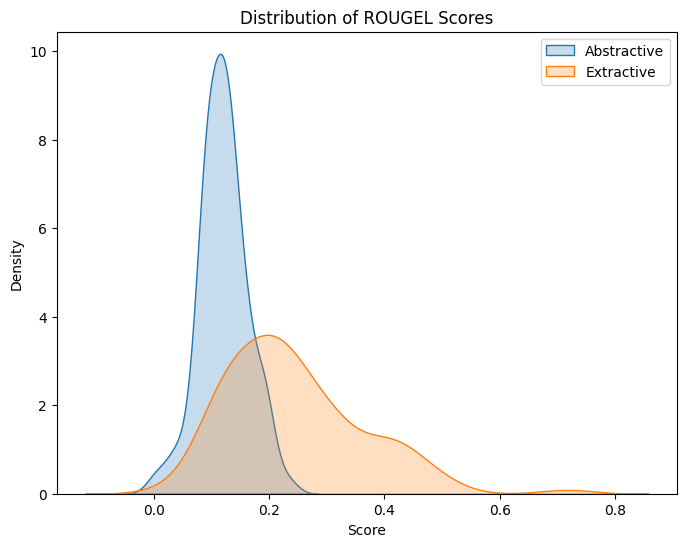

In [28]:
# Plot ROUGE distributions
metrics = ['rouge1', 'rouge2', 'rougeL']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(rouge_df[f'abstractive_{metric}'], label='Abstractive', shade=True)
    sns.kdeplot(rouge_df[f'extractive_{metric}'], label='Extractive', shade=True)
    plt.title(f'Distribution of {metric.upper()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

### Analysis of Sentiment Scores

In [30]:
# Describe sentiment scores for each type
print("Extractive Sentiment Scores:")
print(merged_df[['extractive_positive', 'extractive_neutral', 'extractive_negative']].describe())

print("\nAbstractive Sentiment Scores:")
print(merged_df[['abstractive_positive', 'abstractive_neutral', 'abstractive_negative']].describe())

print("\nHuman Sentiment Scores:")
print(merged_df[['human_positive', 'human_neutral', 'human_negative']].describe())

Extractive Sentiment Scores:
       extractive_positive  extractive_neutral  extractive_negative
count           100.000000          100.000000           100.000000
mean              0.188937            0.431006             0.380057
std               0.268933            0.211625             0.294666
min               0.003872            0.034890             0.001188
25%               0.018359            0.242687             0.107147
50%               0.047749            0.454605             0.351740
75%               0.232410            0.584983             0.631202
max               0.962816            0.869617             0.887185

Abstractive Sentiment Scores:
       abstractive_positive  abstractive_neutral  abstractive_negative
count            100.000000           100.000000            100.000000
mean               0.262261             0.421256              0.316483
std                0.328358             0.245579              0.307757
min                0.002671             0.01

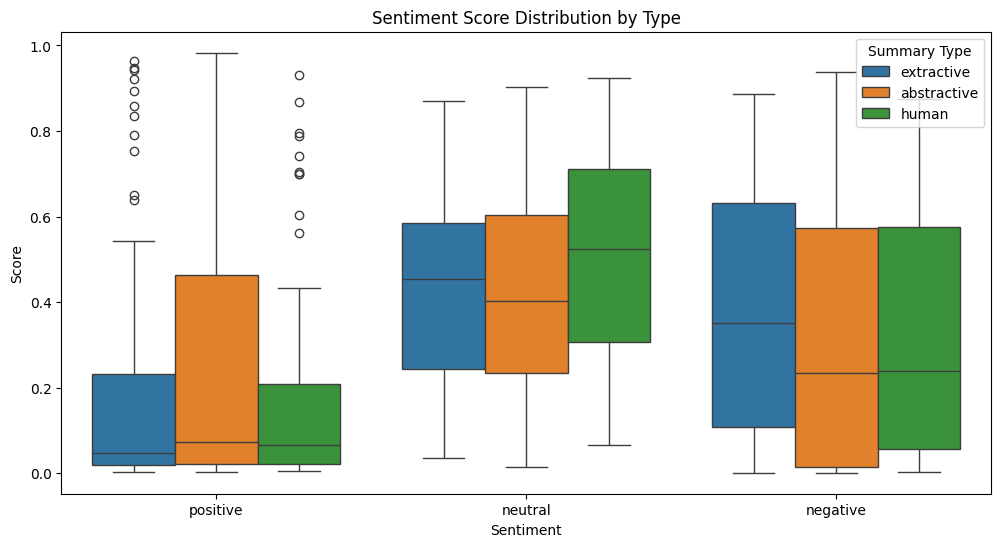

In [32]:
# Melt the DataFrame for sentiment analysis
sentiment_cols = ['extractive_positive', 'extractive_neutral', 'extractive_negative',
                  'abstractive_positive', 'abstractive_neutral', 'abstractive_negative',
                  'human_positive', 'human_neutral', 'human_negative']

sentiment_melted = merged_df.melt(value_vars=sentiment_cols, var_name='type_sentiment', value_name='score')
sentiment_melted['type'] = sentiment_melted['type_sentiment'].apply(lambda x: x.split('_')[0])
sentiment_melted['sentiment'] = sentiment_melted['type_sentiment'].apply(lambda x: x.split('_')[1])

# Boxplot of sentiment scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=sentiment_melted, x='sentiment', y='score', hue='type')
plt.title('Sentiment Score Distribution by Type')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.legend(title='Summary Type')
plt.show()

In [33]:
# Count sentiment labels for each type
print("Extractive Sentiment Labels:")
print(merged_df['extractive_label'].value_counts())

print("\nAbstractive Sentiment Labels:")
print(merged_df['abstractive_label'].value_counts())

print("\nHuman Sentiment Labels:")
print(merged_df['human_label'].value_counts())

Extractive Sentiment Labels:
extractive_label
Neutral     44
Negative    39
Positive    17
Name: count, dtype: int64

Abstractive Sentiment Labels:
abstractive_label
Neutral     39
Negative    37
Positive    24
Name: count, dtype: int64

Human Sentiment Labels:
human_label
Neutral     53
Negative    37
Positive    10
Name: count, dtype: int64


In [42]:
sentiment_melted

,type_sentiment,score,type,sentiment
0,extractive_positive,0.037798,extractive,positive
1,extractive_positive,0.495356,extractive,positive
2,extractive_positive,0.008990,extractive,positive
3,extractive_positive,0.946435,extractive,positive
4,extractive_positive,0.129470,extractive,positive
...,...,...,...,...
895,human_negative,0.784219,human,negative
896,human_negative,0.011107,human,negative
897,human_negative,0.027636,human,negative
898,human_negative,0.142961,human,negative


/var/folders/zm/fr635kq51d35fklpj2hv3s240000gn/T/ipykernel_55646/1609251578.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=grouped_df, x='sentiment', y='score', hue='type', ci=None)


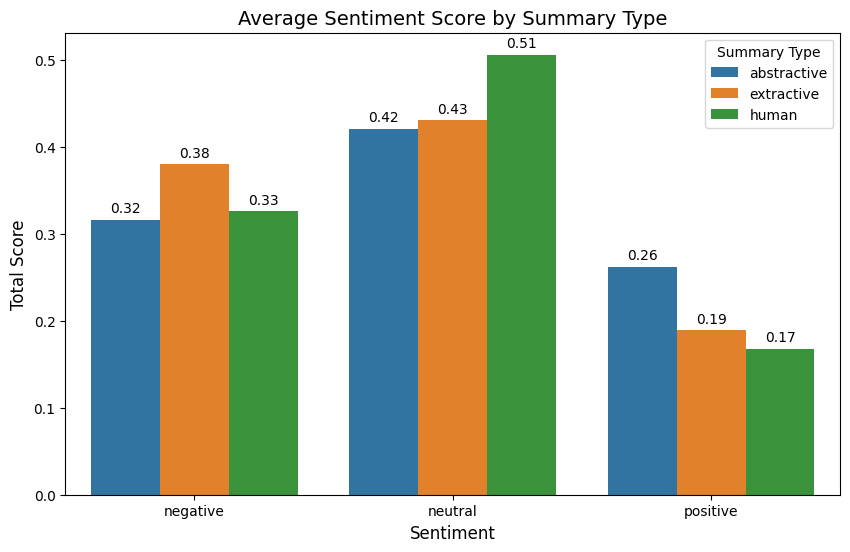

In [66]:
# Group by 'type' and 'sentiment' to calculate the total or mean score
grouped_df = sentiment_melted.groupby(['type', 'sentiment'])['score'].mean().reset_index()

# Plot the clustered bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=grouped_df, x='sentiment', y='score', hue='type', ci=None)

# Add values on top of each bar
for bar in bar_plot.containers:
    bar_plot.bar_label(bar, fmt='%.2f', padding=3)

# Customize the chart
plt.title('Average Sentiment Score by Summary Type', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Total Score', fontsize=12)
plt.legend(title='Summary Type', fontsize=10)
plt.show()

In [49]:
grouped_df

,type,sentiment,score
0,abstractive,negative,31.648279
1,abstractive,neutral,42.125580
2,abstractive,positive,26.226140
3,extractive,negative,38.005720
4,extractive,neutral,43.100589
5,extractive,positive,18.893691
6,human,negative,32.616679
7,human,neutral,50.617107
8,human,positive,16.766213


In [58]:
merged_df

,article,human_summary,abstractive_summary_x,extractive_summary_x,abstractive_rouge1,abstractive_rouge2,abstractive_rougeL,extractive_rouge1,extractive_rouge2,extractive_rougeL,...,extractive_neutral,extractive_positive,abstractive_label,abstractive_negative,abstractive_neutral,abstractive_positive,human_label,human_negative,human_neutral,human_positive
0,Bernie Ecclestone has urged Formula One's team...,"Ferrari, Red Bull, McLaren and Mercedes receiv...",Eccliode has been in the news a lot lately for...,Bernie Ecclestone has urged Formula One's team...,0.098160,0.000000,0.073620,0.491803,0.366667,0.409836,...,0.406143,0.037798,Negative,0.830958,0.157185,0.011857,Neutral,0.458119,0.494356,0.047525
1,The world's oldest primate - dating back 55 mi...,Archicebus achilles was found near the Yangtze...,The new prune is the oldest living tree in Nor...,The world's oldest primate - dating back 55 mi...,0.157143,0.014493,0.114286,0.342342,0.128440,0.216216,...,0.486418,0.495356,Positive,0.003537,0.317980,0.678483,Neutral,0.073779,0.732928,0.193293
2,By . Daily Mail Reporter . Updated: . 01:46 ES...,Pat Taccetta says ‘justice will be done’ over ...,"The killer, who is believed to be from the sam...","By. Daily Mail Reporter. Updated:. 01:46 EST, ...",0.163934,0.000000,0.087432,0.253521,0.042857,0.084507,...,0.149145,0.008990,Negative,0.858300,0.133702,0.007998,Negative,0.815181,0.178062,0.006757
3,By . John Greechan . Amateur champion Bradley ...,Bradley Neil achieved one of his Open ambition...,The following is a list of the top 10 Open pla...,By. John Greechan. Amateur champion Bradley Ne...,0.088496,0.000000,0.088496,0.474227,0.273684,0.412371,...,0.052377,0.946435,Neutral,0.048746,0.777486,0.173767,Neutral,0.028466,0.714119,0.257415
4,"By . David Martosko, U.s. Political Editor . P...",Trump could face a crowded Republican primary ...,Donald J. Trump has been a major player in the...,"By. David Martosko, U.s. Political Editor. PUB...",0.162437,0.010256,0.131980,0.189781,0.029630,0.116788,...,0.641056,0.129470,Positive,0.016589,0.411372,0.572039,Neutral,0.075489,0.746573,0.177937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Beijing, China (CNN) -- The Chinese public, es...",Goldkorn: Web uproar focused on whether Li wil...,Li is charged in connection with the killing o...,"Beijing, China (CNN) -- The Chinese public, es...",0.112676,0.000000,0.084507,0.188034,0.069565,0.119658,...,0.275380,0.011424,Negative,0.635057,0.357834,0.007109,Negative,0.784219,0.204593,0.011188
96,Andre Schurrle impressed on his debut for Wolf...,Andre Schurrle grabbed two assists on his Wolf...,Schürrles is a player who has been a key part ...,Andre Schurrle impressed on his debut for Wolf...,0.175000,0.000000,0.125000,0.438596,0.160714,0.298246,...,0.140718,0.857390,Positive,0.001373,0.094881,0.903746,Neutral,0.011107,0.748022,0.240870
97,"Philip Levine, a Pulitzer Prize-winning poet w...","One of the country's most decorated poets, Lev...",The following is a list of the most important ...,"Philip Levine, a Pulitzer Prize-winning poet w...",0.100719,0.014599,0.086331,0.476190,0.289655,0.326531,...,0.344331,0.637970,Neutral,0.011685,0.703612,0.284703,Positive,0.027636,0.367603,0.604761
98,(CNN) -- When it comes to deciding where the m...,The Lotus Formula One team says it prioritizes...,The Lotus F3 team has been in talks with Ferra...,(CNN) -- When it comes to deciding where the m...,0.267857,0.036364,0.196429,0.507246,0.220588,0.289855,...,0.715619,0.087342,Neutral,0.047805,0.903543,0.048652,Neutral,0.142961,0.732054,0.124985


In [60]:
from scipy.stats import f_oneway

# ANOVA for Positive Sentiment Scores
f_stat, p_val = f_oneway(merged_df['extractive_positive'], merged_df['abstractive_positive'], merged_df['human_positive'])
print(f"Positive Sentiment Scores - ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")

# ANOVA for Neutral Sentiment Scores
f_stat, p_val = f_oneway(merged_df['extractive_neutral'], merged_df['abstractive_neutral'], merged_df['human_neutral'])
print(f"Neutral Sentiment Scores - ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")

# ANOVA for Negative Sentiment Scores
f_stat, p_val = f_oneway(merged_df['extractive_negative'], merged_df['abstractive_negative'], merged_df['human_negative'])
print(f"Negative Sentiment Scores - ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")

Positive Sentiment Scores - ANOVA: F-statistic = 3.22, p-value = 0.0414
Neutral Sentiment Scores - ANOVA: F-statistic = 4.19, p-value = 0.0161
Negative Sentiment Scores - ANOVA: F-statistic = 1.33, p-value = 0.2671


Tukey HSD Results for Positive Sentiment Scores
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
abstractive extractive  -0.0733 0.1479 -0.1655  0.0188  False
abstractive      human  -0.0946 0.0427 -0.1867 -0.0025   True
 extractive      human  -0.0213 0.8497 -0.1134  0.0709  False
-------------------------------------------------------------


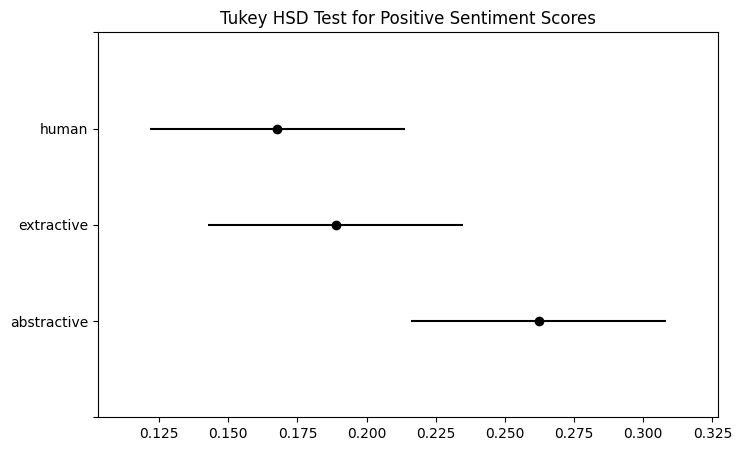

Tukey HSD Results for Neutral Sentiment Scores
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
abstractive extractive   0.0098 0.9505 -0.0659 0.0854  False
abstractive      human   0.0849 0.0234  0.0093 0.1606   True
 extractive      human   0.0752  0.052 -0.0005 0.1508  False
------------------------------------------------------------


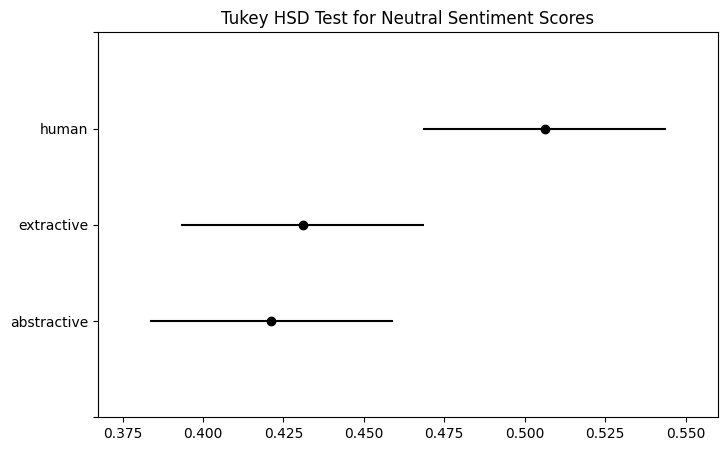

Tukey HSD Results for Negative Sentiment Scores
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
abstractive extractive   0.0636 0.2871 -0.0355 0.1627  False
abstractive      human   0.0097 0.9712 -0.0894 0.1088  False
 extractive      human  -0.0539  0.407  -0.153 0.0452  False
------------------------------------------------------------


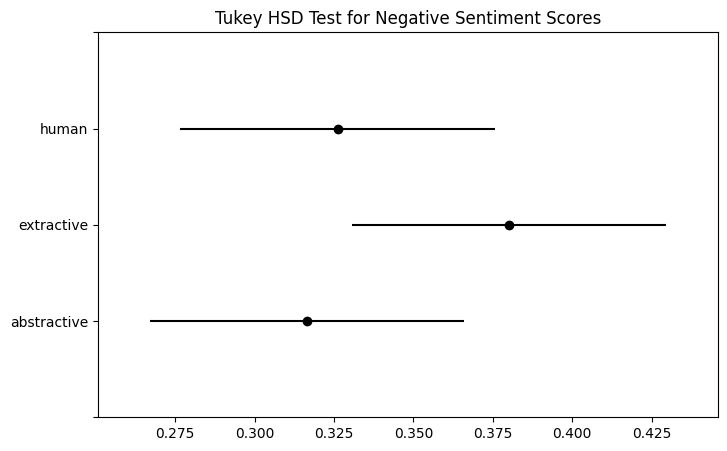

In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example: Tukey HSD for Positive Sentiment Scores
tukey_positive = pairwise_tukeyhsd(
    endog=pd.concat([merged_df['extractive_positive'], merged_df['abstractive_positive'], merged_df['human_positive']]),
    groups=['extractive'] * len(merged_df['extractive_positive']) +
           ['abstractive'] * len(merged_df['abstractive_positive']) +
           ['human'] * len(merged_df['human_positive']),
    alpha=0.05
)

# Print and plot Tukey HSD results for Positive Sentiment
print("Tukey HSD Results for Positive Sentiment Scores")
print(tukey_positive)
tukey_positive.plot_simultaneous(figsize=(8, 5))
plt.title('Tukey HSD Test for Positive Sentiment Scores')
plt.show()

# Example: Tukey HSD for Neutral Sentiment Scores
tukey_neutral = pairwise_tukeyhsd(
    endog=pd.concat([merged_df['extractive_neutral'], merged_df['abstractive_neutral'], merged_df['human_neutral']]),
    groups=['extractive'] * len(merged_df['extractive_neutral']) +
           ['abstractive'] * len(merged_df['abstractive_neutral']) +
           ['human'] * len(merged_df['human_neutral']),
    alpha=0.05
)

# Print and plot Tukey HSD results for Neutral Sentiment
print("Tukey HSD Results for Neutral Sentiment Scores")
print(tukey_neutral)
tukey_neutral.plot_simultaneous(figsize=(8, 5))
plt.title('Tukey HSD Test for Neutral Sentiment Scores')
plt.show()

# Example: Tukey HSD for Negative Sentiment Scores
tukey_negative = pairwise_tukeyhsd(
    endog=pd.concat([merged_df['extractive_negative'], merged_df['abstractive_negative'], merged_df['human_negative']]),
    groups=['extractive'] * len(merged_df['extractive_negative']) +
           ['abstractive'] * len(merged_df['abstractive_negative']) +
           ['human'] * len(merged_df['human_negative']),
    alpha=0.05
)

# Print and plot Tukey HSD results for Negative Sentiment
print("Tukey HSD Results for Negative Sentiment Scores")
print(tukey_negative)
tukey_negative.plot_simultaneous(figsize=(8, 5))
plt.title('Tukey HSD Test for Negative Sentiment Scores')
plt.show()


### Discrepency Analysis

In [64]:
# Add flags for discrepancies
merged_df['discrepancy_extractive_human'] = merged_df['extractive_label'] != merged_df['human_label']
merged_df['discrepancy_abstractive_human'] = merged_df['abstractive_label'] != merged_df['human_label']
merged_df['discrepancy_extractive_abstractive'] = merged_df['extractive_label'] != merged_df['abstractive_label']

label_columns = ['extractive_label','abstractive_label', 'human_label', 
                 'discrepancy_extractive_human', 'discrepancy_abstractive_human',
                   'discrepancy_extractive_abstractive']
label_df = merged_df[label_columns]
label_df

,extractive_label,abstractive_label,human_label,discrepancy_extractive_human,discrepancy_abstractive_human,discrepancy_extractive_abstractive
0,Negative,Negative,Neutral,True,True,False
1,Positive,Positive,Neutral,True,True,False
2,Negative,Negative,Negative,False,False,False
3,Positive,Neutral,Neutral,True,False,True
4,Neutral,Positive,Neutral,False,True,True
...,...,...,...,...,...,...
95,Negative,Negative,Negative,False,False,False
96,Positive,Positive,Neutral,True,True,False
97,Positive,Neutral,Positive,False,True,True
98,Neutral,Neutral,Neutral,False,False,False


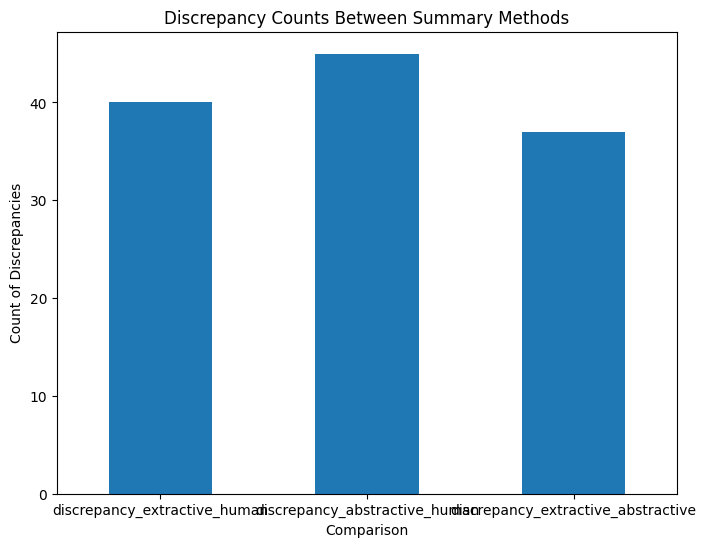

In [65]:
# Count discrepancies
discrepancy_counts = merged_df[['discrepancy_extractive_human', 'discrepancy_abstractive_human', 
                                'discrepancy_extractive_abstractive']].sum()

# Plot
discrepancy_counts.plot(kind='bar', figsize=(8, 6), title='Discrepancy Counts Between Summary Methods', rot=0)
plt.ylabel('Count of Discrepancies')
plt.xlabel('Comparison')
plt.show()